# Project - Perceptron
- Try a Perceptron model with more dimensions

### Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

### Step 2: Read the data
- Use Pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method to read **files/weather.csv**
- HINT: Use **parse_dates=True** and **index_col=0**

In [3]:
data = pd.read_csv('files/weather.csv', parse_dates=True, index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3337 entries, 2008-02-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        3334 non-null   float64
 1   MaxTemp        3335 non-null   float64
 2   Rainfall       3331 non-null   float64
 3   Evaporation    3286 non-null   float64
 4   Sunshine       3321 non-null   float64
 5   WindGustDir    2301 non-null   object 
 6   WindGustSpeed  2301 non-null   float64
 7   WindDir9am     3281 non-null   object 
 8   WindDir3pm     3304 non-null   object 
 9   WindSpeed9am   3311 non-null   float64
 10  WindSpeed3pm   3312 non-null   float64
 11  Humidity9am    3323 non-null   float64
 12  Humidity3pm    3324 non-null   float64
 13  Pressure9am    3317 non-null   float64
 14  Pressure3pm    3318 non-null   float64
 15  Cloud9am       2771 non-null   float64
 16  Cloud3pm       2776 non-null   float64
 17  Temp9am        3333 non-null   flo

### Step 3: Investigate data
- Look for missing data points
- You can do that by applying **isna()** and **sum()**, which will give a summary of rows missing data for each column.
    - Resource: [isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)
    - Resource: [sum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

In [4]:
cols_with_missing = data.isnull().sum()
# null count가 100 보다 큰 cols
cols_with_missing[cols_with_missing > 100]

WindGustDir      1036
WindGustSpeed    1036
Cloud9am          566
Cloud3pm          561
dtype: int64

### Step 4: Remove 'dirty' columns 
- Make a choice and remove columns with too many entries with NaN.
- Say, take all columns with more than 100 rows.
- Also, you can remove rows with non-numeric values (remember to keep **RainTomorrow**)
- To remove rows use [drop(columns, axis=1)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [5]:
dataset = data.copy()
dirty_columns = ['WindGustDir','WindGustSpeed','Cloud9am','Cloud3pm', # null count가 100 보다 큰 cols
                'WindDir9am', 'WindDir3pm', 'RainToday'] # cols with non-numeric values

dataset.drop(dirty_columns, axis=1, inplace=True)
dataset.info() # 3337 entries

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3337 entries, 2008-02-01 to 2017-06-25
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3334 non-null   float64
 1   MaxTemp       3335 non-null   float64
 2   Rainfall      3331 non-null   float64
 3   Evaporation   3286 non-null   float64
 4   Sunshine      3321 non-null   float64
 5   WindSpeed9am  3311 non-null   float64
 6   WindSpeed3pm  3312 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Temp9am       3333 non-null   float64
 12  Temp3pm       3333 non-null   float64
 13  RISK_MM       3337 non-null   float64
 14  RainTomorrow  3337 non-null   object 
dtypes: float64(14), object(1)
memory usage: 417.1+ KB


- [select_dtypes](https://stackoverflow.com/questions/48817592/how-to-drop-dataframe-columns-based-on-dtype)
- [api](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [6]:
#dataset = dataset.select_dtypes(exclude=['object'])
#dataset.info() # RainTomorrow가 gone

### Step 5: Deal with remaining missing data
- A simple choice is to simply remove rows with missing data
- Use [dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

In [7]:
Dataset = dataset.copy()
Dataset.dropna(axis=0, inplace=True)
Dataset.info() # 3187 entries

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3187 entries, 2008-02-01 to 2017-06-25
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3187 non-null   float64
 1   MaxTemp       3187 non-null   float64
 2   Rainfall      3187 non-null   float64
 3   Evaporation   3187 non-null   float64
 4   Sunshine      3187 non-null   float64
 5   WindSpeed9am  3187 non-null   float64
 6   WindSpeed3pm  3187 non-null   float64
 7   Humidity9am   3187 non-null   float64
 8   Humidity3pm   3187 non-null   float64
 9   Pressure9am   3187 non-null   float64
 10  Pressure3pm   3187 non-null   float64
 11  Temp9am       3187 non-null   float64
 12  Temp3pm       3187 non-null   float64
 13  RISK_MM       3187 non-null   float64
 14  RainTomorrow  3187 non-null   object 
dtypes: float64(14), object(1)
memory usage: 398.4+ KB


### Step 6: Create training and test datasets
- Define dataset **X** to consist of all data except **'RainTomorrow'**.
    - Use [dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
- Define dataset **y** to be datset cosisting of **'RainTomorrow'**.
- Divide into **X_train, X_test, y_train, y_test** with **train_test_split**
    - You can use **random_state=42** (or any other number) if you want to reproduce results.

In [17]:
X = Dataset.loc[:, :'RISK_MM'] # dataset
y = Dataset.loc[:, 'RainTomorrow']
y = np.array([0 if value == 'No' else 1 for value in y])
y

array([1, 1, 1, ..., 0, 0, 0])

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42)

### Step 7: Train and test the model
- Create classifier with **Perceptron**
    - You can use **random_state=0** to be able to reproduce
- Fit the model with training data **(X_train, y_train**)
- Predict data from **X_test** (use predict) and assign to **y_pred**.
- Evalute score by using **metrics.accuracy_score(y_test, y_pred)**.
- You can redo with different choice of columns

In [10]:
clf = Perceptron(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)
accuracy_score(y_valid, y_pred) # 80% accurate

0.8055207026348808

### Step 8 (Optional): Plot the result
- Use Matplotlib.pyplot (**plt**) with **subplots** to create a figure and axes (**fig, ax**)
- Predict all the datapoints in **X**.
- Make a scatter plot with all datapoints in **X** with color by the predictions made.
    - You might want to use **alpha=0.25** in your plot as argument.

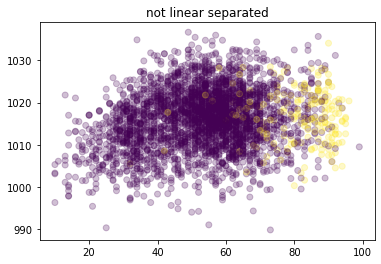

In [18]:
fig, ax = plt.subplots()

y_pred = clf.predict(X)

ax.scatter(x=X['Humidity3pm'], y=X['Pressure3pm'], c=y_pred, alpha=.25)
plt.title('not linearly separated') # optimal line in multi-dimension 
plt.show()